In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
data=pd.read_csv("cleaned.csv")
data.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


In [5]:
# Check for missing values
print(data.isnull().sum())


Age_band_of_driver         0
Sex_of_driver              0
Educational_level          0
Vehicle_driver_relation    0
Driving_experience         0
Lanes_or_Medians           0
Types_of_Junction          0
Road_surface_type          0
Light_conditions           0
Weather_conditions         0
Type_of_collision          0
Vehicle_movement           0
Pedestrian_movement        0
Cause_of_accident          0
Accident_severity          0
dtype: int64


In [6]:
data['Light_conditions'] = data['Light_conditions'].str.lower()
data['Weather_conditions'] = data['Weather_conditions'].str.lower()

In [9]:
# Create a Time_of_day feature from Light_conditions
conditions = [
    data['Light_conditions'].str.contains('daylight'),
    data['Light_conditions'].str.contains('darkness'),
    data['Light_conditions'].str.contains('dawn|dusk')
]
choices = ['Day', 'Night', 'Dawn/Dusk']
data['Time_of_day'] = np.select(conditions, choices, default='Unknown')

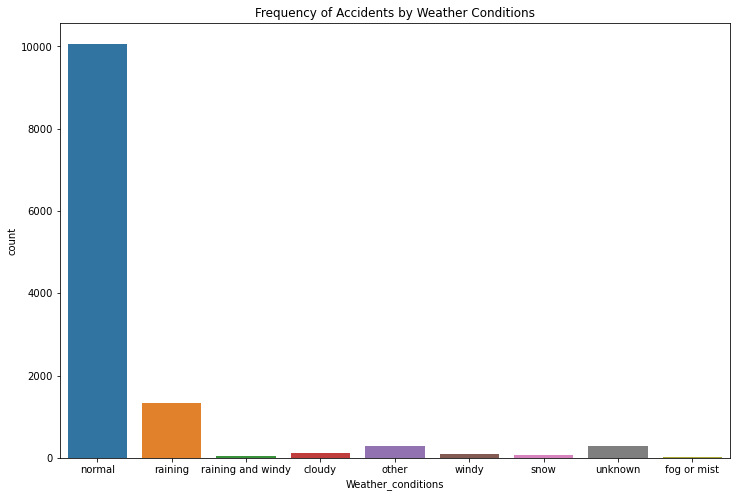

In [16]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Weather_conditions', data=data)
plt.title('Frequency of Accidents by Weather Conditions')
plt.show()


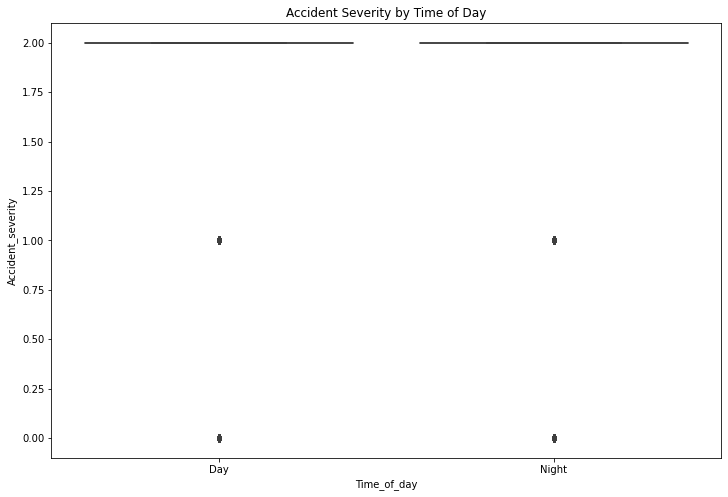

In [17]:
# Accident severity by Time_of_day
plt.figure(figsize=(12, 8))
sns.boxplot(x='Time_of_day', y='Accident_severity', data=data)
plt.title('Accident Severity by Time of Day')
plt.show()

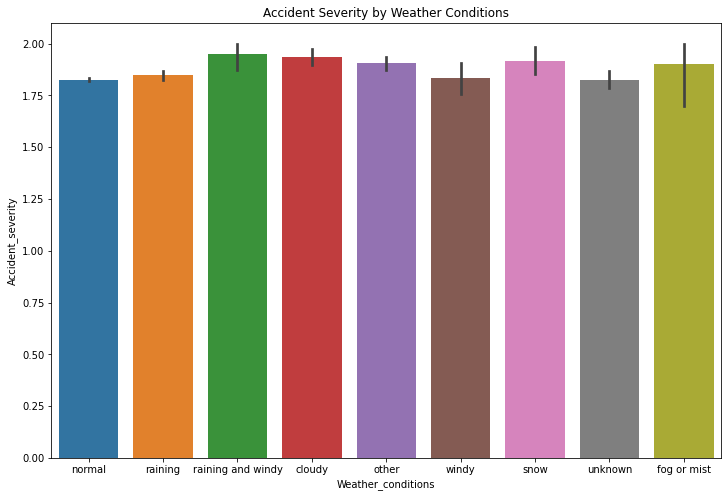

In [18]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Weather_conditions', y='Accident_severity', data=data)
plt.title('Accident Severity by Weather Conditions')
plt.show()

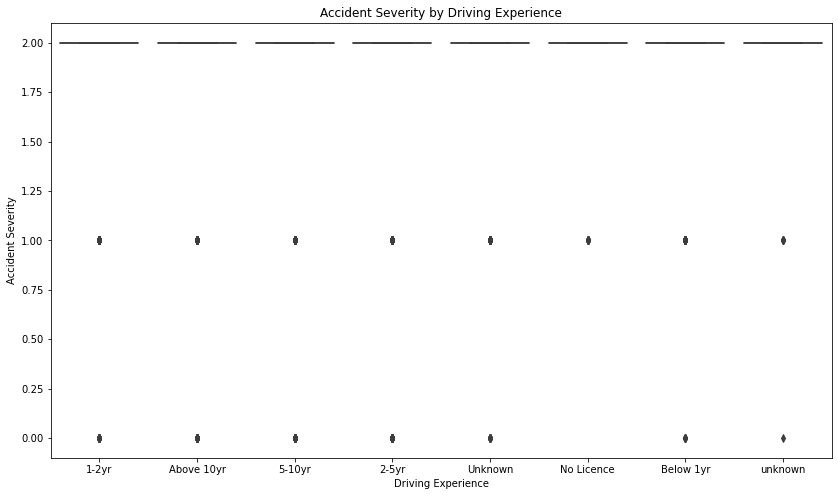

In [19]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Driving_experience', y='Accident_severity', data=data)
plt.title('Accident Severity by Driving Experience')
plt.xlabel('Driving Experience')
plt.ylabel('Accident Severity')
plt.show()


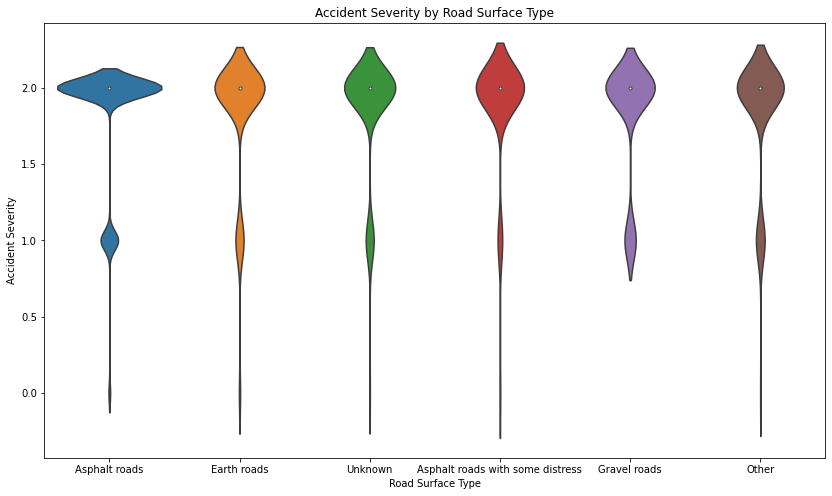

In [20]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Road_surface_type', y='Accident_severity', data=data)
plt.title('Accident Severity by Road Surface Type')
plt.xlabel('Road Surface Type')
plt.ylabel('Accident Severity')
plt.show()


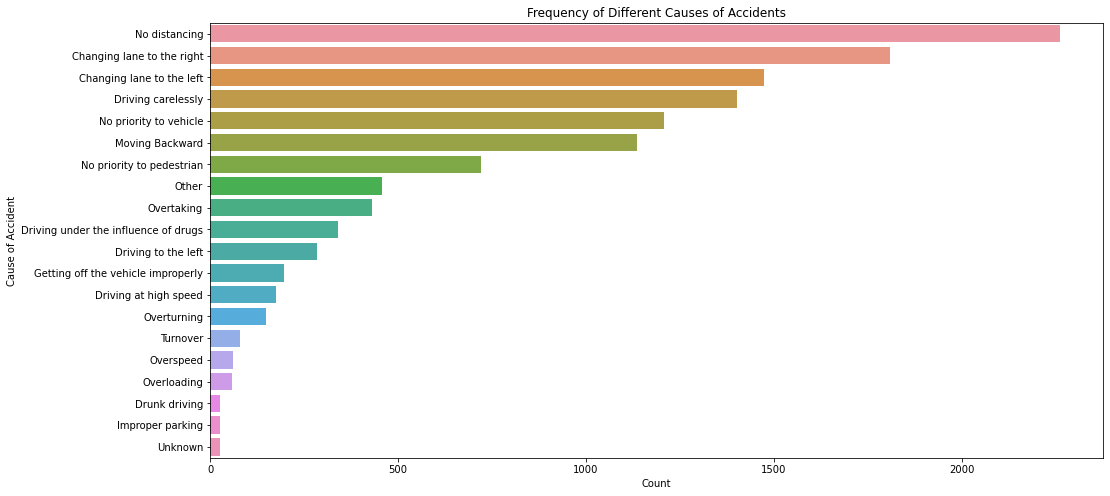

In [22]:
plt.figure(figsize=(16, 8))
sns.countplot(y='Cause_of_accident', data=data, order=data['Cause_of_accident'].value_counts().index)
plt.title('Frequency of Different Causes of Accidents')
plt.xlabel('Count')
plt.ylabel('Cause of Accident')
plt.show()


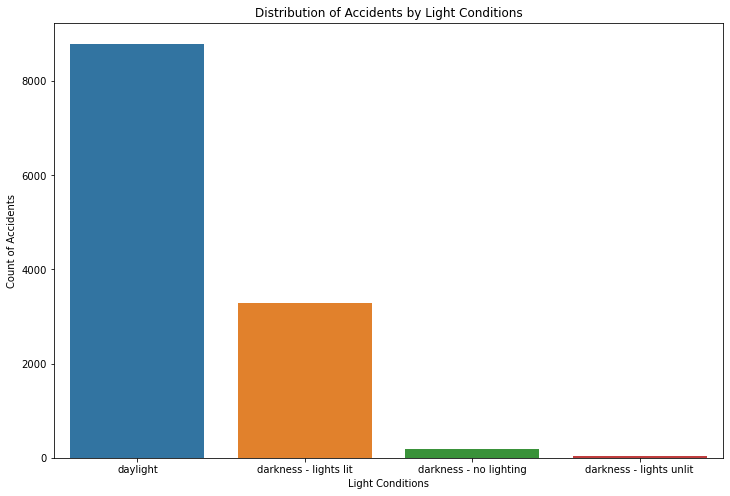

In [23]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Light_conditions', data=data)
plt.title('Distribution of Accidents by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Count of Accidents')
plt.show()


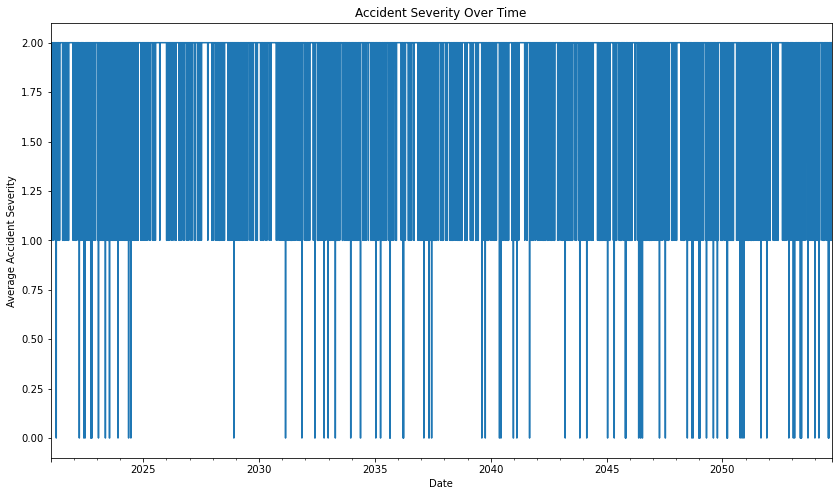

In [24]:
# Example: Adding a date column for the demonstration (if not already present)
data['Date'] = pd.date_range(start='1/1/2021', periods=len(data), freq='D')

plt.figure(figsize=(14, 8))
data.groupby('Date')['Accident_severity'].mean().plot()
plt.title('Accident Severity Over Time')
plt.xlabel('Date')
plt.ylabel('Average Accident Severity')
plt.show()
